# Kaggle_고객의 LTV 예측 분석_회귀 모델 / 로지스틱 회귀 분석
- https://www.kaggle.com/datasets/harunrai/fintech-customer-life-time-value-ltv-dataset

---

- Customer_ID(고객ID): Unique identifier for each customer
- Age(고객나이)
    - The age of the customer, ranging from 18 to 70 years
    - 나이대로 변환하여 구분 고려
- Location(고객 거주지)
    - Geographical location of the customer
    - categorized as Urban(도시), Suburban(교외), and Rural(농촌)으로 구분
- Income_Level(소득 수준): 
    - Income classification of the customer
    - Low(낮음), Middle(중간), or High(높음)으로 구분
- Total_Transactions(전체 거래 수) : Total number of transactions made by the customer
- Avg_Transaction_Value(거래당 평균 금액(루피)): Average value of each transaction in Rupees
- Total_Spent(지출 총액(루피)): The total amount spent by the customer in Rupees
- Max_Transaction_Value(최고 지출(루피)): The highest single transaction value recorded in Rupees
- Min_Transaction_Value(최하 지출(루피)): The lowest single transaction value recorded in Rupees
- Active_Days(고객 활동 일수): Number of days the customer has been active on the platform
- Last_Transaction_Days_Ago(마지막 거래 이후 경과된 일수): Days since the customer’s last transaction
- Loyalty_Points_Earned(총 로열티): Total loyalty points earned by the customer
- Referral_Count(고객이 추천하여 유입시킨 신규 고객 수): Number of new customers referred by the user
- Cashback_Received(캐시백 금액): Total cashback received by the customer
- App_Usage_Frequency(앱 사용 빈도)
    - Frequency of app usage
    - categorized as Daily(일간), Weekly(주간), or Monthly(월간)으로 구분
- Preferred_Payment_Method(자주 사용하는 결제 방식): The most frequently used payment method by the customer
- Support_Tickets_Raised(문의/불만 제기 횟수): Number of support tickets raised by the customer
- Issue_Resolution_Time(고객 문제 해결 소요 시간): Average time taken to resolve customer issues, in hours
- Customer_Satisfaction_Score(고객 만족도 점수)
    - A score (1-10) reflecting customer satisfaction
- LTV(고객 생애 가치): The target variable representing the estimated Lifetime Value of the customer


## 00. 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

## 01. 데이터 불러오기 및 확인

In [3]:
data = pd.read_csv('./data/digital_wallet_ltv_dataset.csv')
data.head()

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

In [12]:
data.describe(include='all')

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
count,7000,7000.000000,7000,7000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000,7000,7000.000000,7000.000000,7000.000000,7.000000e+03
unique,7000,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,NaN,NaN,NaN,NaN
top,cust_6999,NaN,Urban,Middle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daily,UPI,NaN,NaN,NaN,NaN
freq,1,NaN,2368,2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2346,1791,NaN,NaN,NaN,NaN
mean,NaN,42.633714,NaN,NaN,501.221429,9946.831482,30159.596784,2981.549953,5.002022e+06,181.934857,183.847714,2501.545429,24.837000,2496.525032,NaN,NaN,10.017571,36.528007,5.479000,5.119197e+05
std,NaN,15.516036,NaN,NaN,286.277311,5780.880831,21996.108793,2197.342161,4.390495e+06,105.102598,105.063709,1446.680026,14.560352,1440.651412,NaN,NaN,6.037067,20.389399,2.860197,4.390551e+05
min,NaN,16.000000,NaN,NaN,1.000000,10.185827,31.857484,4.617966,1.498144e+03,1.000000,1.000000,0.000000,0.000000,0.234349,NaN,NaN,0.000000,1.019853,1.000000,3.770495e+03
25%,NaN,29.000000,NaN,NaN,252.000000,4907.466790,12224.329366,1233.066226,1.363991e+06,90.000000,93.000000,1254.750000,12.000000,1269.423703,NaN,NaN,5.000000,19.127302,3.000000,1.482058e+05
50%,NaN,43.000000,NaN,NaN,506.000000,9841.172643,25469.392130,2473.181073,3.756105e+06,182.000000,184.000000,2466.000000,25.000000,2478.943350,NaN,NaN,10.000000,36.257396,5.000000,3.878180e+05
75%,NaN,56.000000,NaN,NaN,744.000000,14955.048801,44515.414177,4378.759195,7.645508e+06,273.000000,275.000000,3792.250000,37.000000,3749.375251,NaN,NaN,15.000000,54.068594,8.000000,7.748578e+05


## 02. 결측치 탐지 및 처리 + 중복값 확인 및 처리

In [6]:
data.isna().sum()

Customer_ID                    0
Age                            0
Location                       0
Income_Level                   0
Total_Transactions             0
Avg_Transaction_Value          0
Max_Transaction_Value          0
Min_Transaction_Value          0
Total_Spent                    0
Active_Days                    0
Last_Transaction_Days_Ago      0
Loyalty_Points_Earned          0
Referral_Count                 0
Cashback_Received              0
App_Usage_Frequency            0
Preferred_Payment_Method       0
Support_Tickets_Raised         0
Issue_Resolution_Time          0
Customer_Satisfaction_Score    0
LTV                            0
dtype: int64

In [8]:
# 중복값 없음을 확인
data[data.duplicated()]

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV


## 03. 이상치 탐지 및 처리

In [9]:
# 수치형 데이터 추출 및 확인
data_num = data.select_dtypes(exclude='object')
data_num.head()

,Age,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,54,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,3,61.568590,1,3.279546e+05
1,67,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,17,60.392889,8,1.437053e+06
2,44,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,11,45.305579,4,2.419387e+05
3,30,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,6,22.030191,1,1.284599e+05
4,58,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,18,20.634723,5,9.569514e+05


<Axes: >

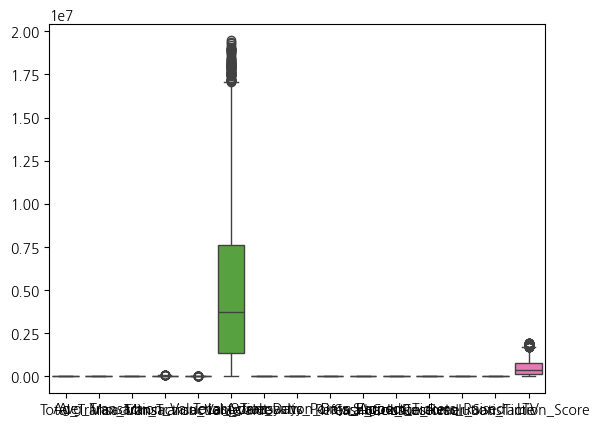

In [10]:
# 전체 수치형 컬럼의 이상치 확인을 위한 박스 플롯
sns.boxplot(data_num)

============================== Age ==============================
Age의 unique의 수 = 54

count    7000.000000
mean       42.633714
std        15.516036
min        16.000000
25%        29.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64



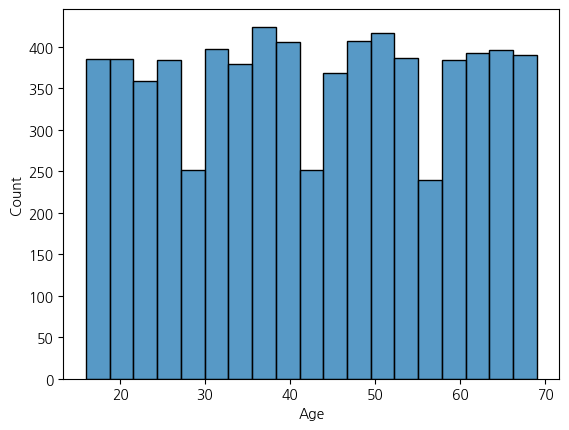

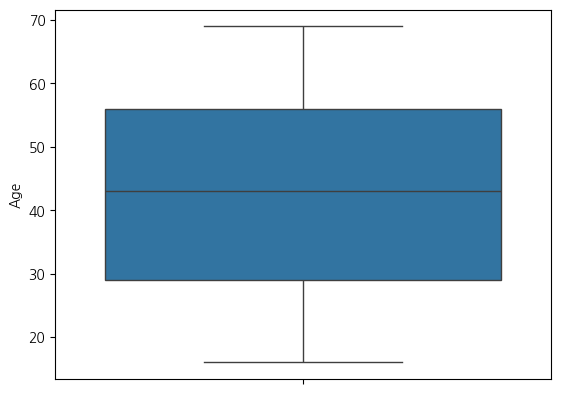


============================== Total_Transactions ==============================
Total_Transactions의 unique의 수 = 999

count    7000.000000
mean      501.221429
std       286.277311
min         1.000000
25%       252.000000
50%       506.000000
75%       744.000000
max      1000.000000
Name: Total_Transactions, dtype: float64



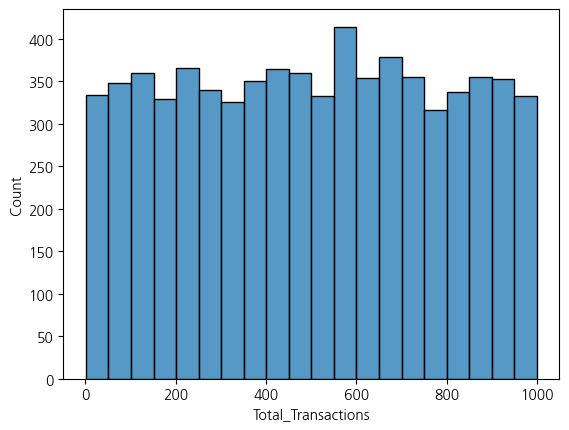

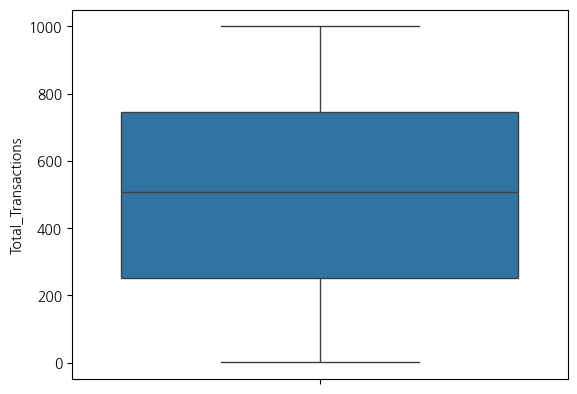


============================== Avg_Transaction_Value ==============================
Avg_Transaction_Value의 unique의 수 = 7000

count     7000.000000
mean      9946.831482
std       5780.880831
min         10.185827
25%       4907.466790
50%       9841.172643
75%      14955.048801
max      19996.445086
Name: Avg_Transaction_Value, dtype: float64



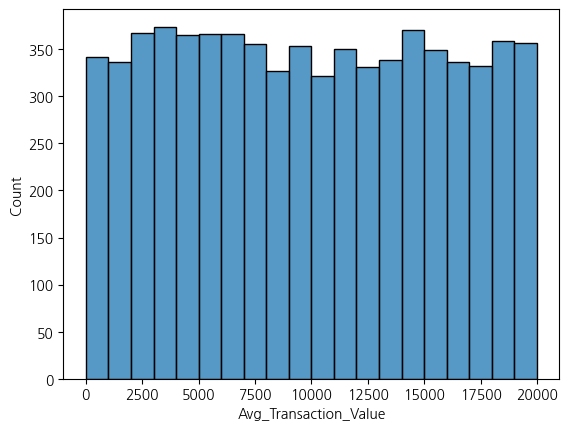

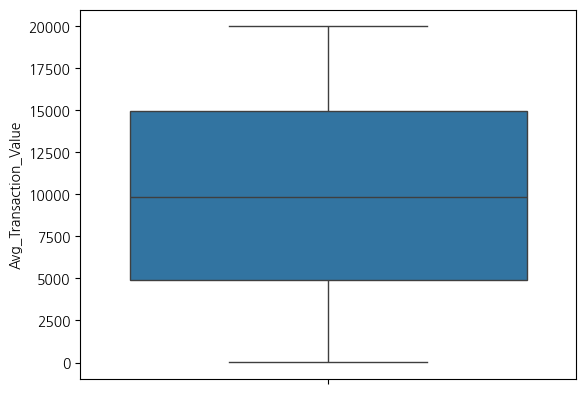


============================== Max_Transaction_Value ==============================
Max_Transaction_Value의 unique의 수 = 7000

count     7000.000000
mean     30159.596784
std      21996.108793
min         31.857484
25%      12224.329366
50%      25469.392130
75%      44515.414177
max      98809.241533
Name: Max_Transaction_Value, dtype: float64



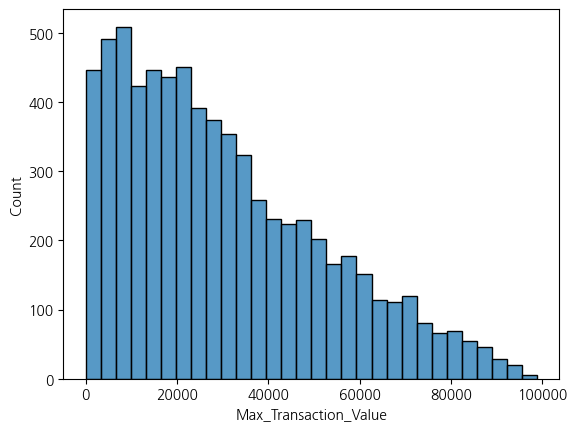

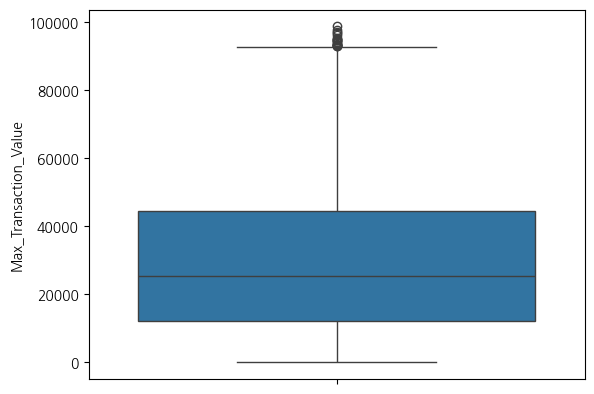


============================== Min_Transaction_Value ==============================
Min_Transaction_Value의 unique의 수 = 7000

count    7000.000000
mean     2981.549953
std      2197.342161
min         4.617966
25%      1233.066226
50%      2473.181073
75%      4378.759195
max      9917.028823
Name: Min_Transaction_Value, dtype: float64



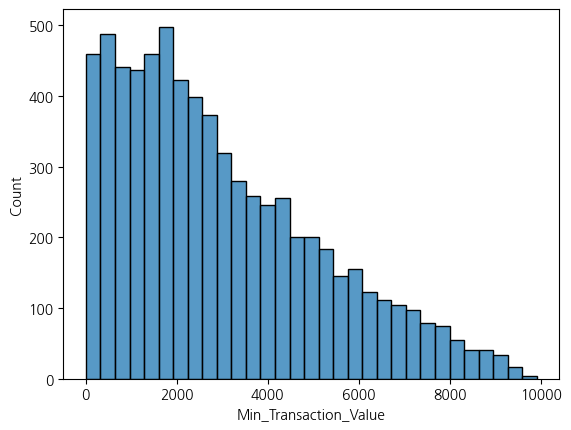

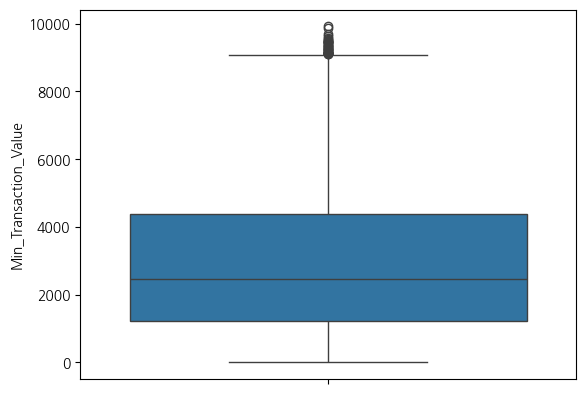


============================== Total_Spent ==============================
Total_Spent의 unique의 수 = 7000

count    7.000000e+03
mean     5.002022e+06
std      4.390495e+06
min      1.498144e+03
25%      1.363991e+06
50%      3.756105e+06
75%      7.645508e+06
max      1.946773e+07
Name: Total_Spent, dtype: float64



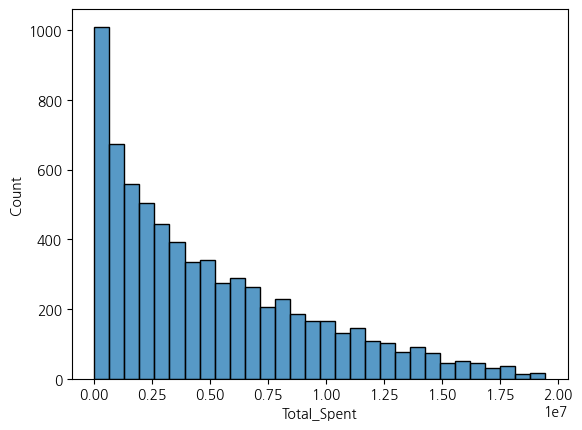

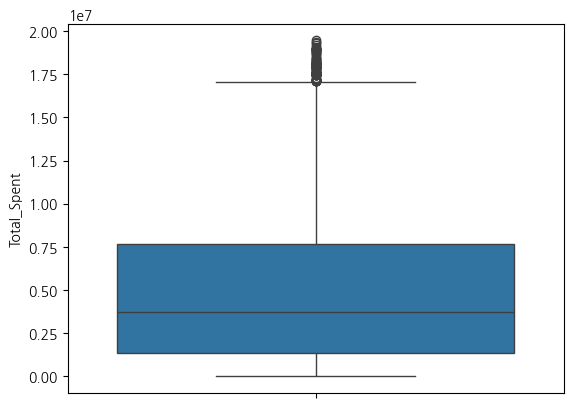


============================== Active_Days ==============================
Active_Days의 unique의 수 = 365

count    7000.000000
mean      181.934857
std       105.102598
min         1.000000
25%        90.000000
50%       182.000000
75%       273.000000
max       365.000000
Name: Active_Days, dtype: float64



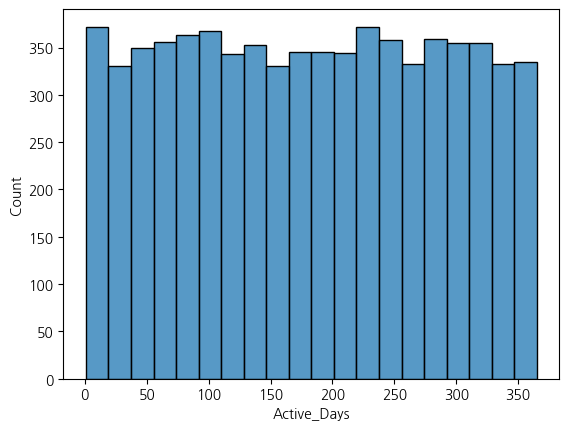

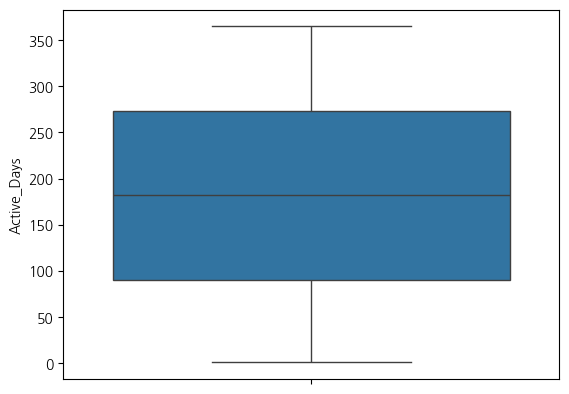


============================== Last_Transaction_Days_Ago ==============================
Last_Transaction_Days_Ago의 unique의 수 = 365

count    7000.000000
mean      183.847714
std       105.063709
min         1.000000
25%        93.000000
50%       184.000000
75%       275.000000
max       365.000000
Name: Last_Transaction_Days_Ago, dtype: float64



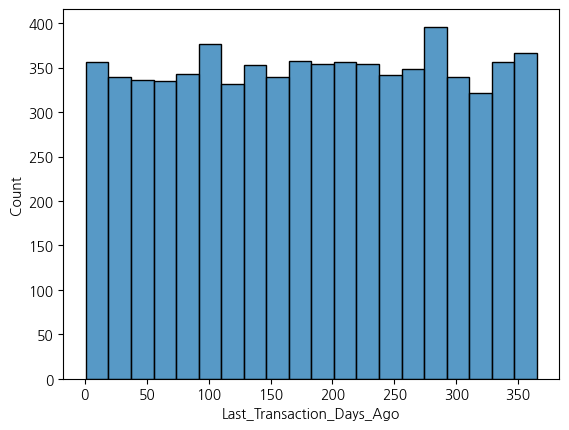

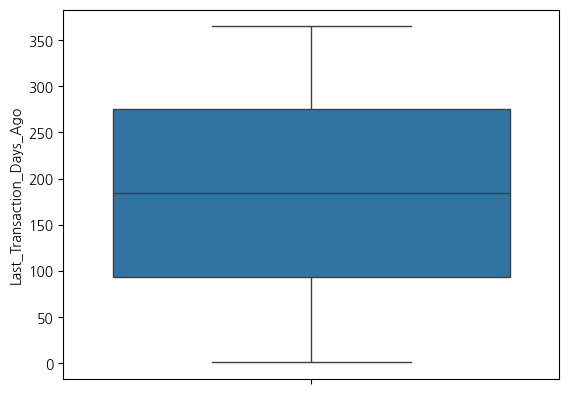


============================== Loyalty_Points_Earned ==============================
Loyalty_Points_Earned의 unique의 수 = 3749

count    7000.000000
mean     2501.545429
std      1446.680026
min         0.000000
25%      1254.750000
50%      2466.000000
75%      3792.250000
max      5000.000000
Name: Loyalty_Points_Earned, dtype: float64



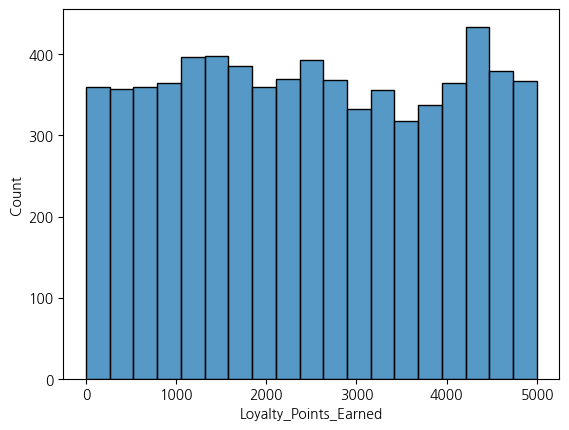

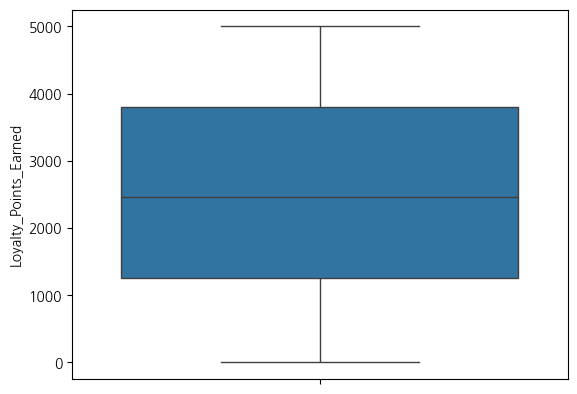


============================== Referral_Count ==============================
Referral_Count의 unique의 수 = 51

count    7000.000000
mean       24.837000
std        14.560352
min         0.000000
25%        12.000000
50%        25.000000
75%        37.000000
max        50.000000
Name: Referral_Count, dtype: float64



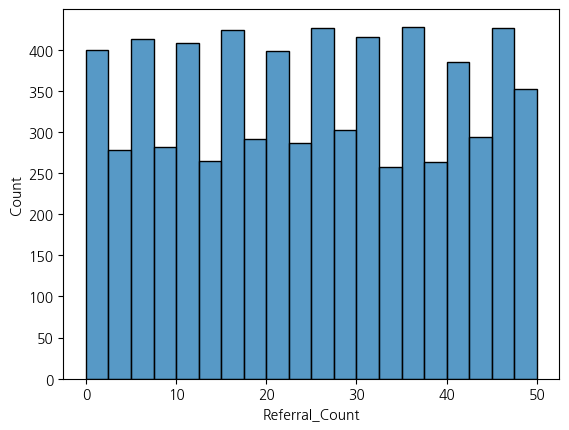

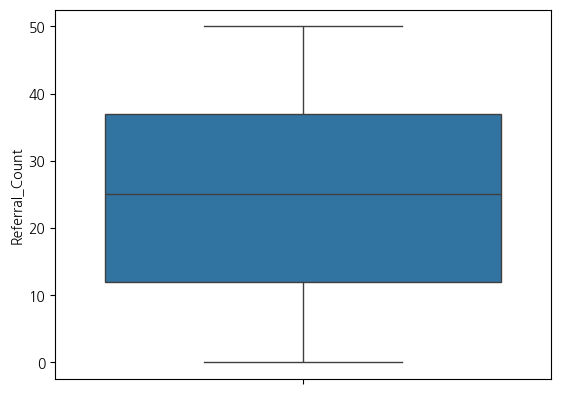


============================== Cashback_Received ==============================
Cashback_Received의 unique의 수 = 7000

count    7000.000000
mean     2496.525032
std      1440.651412
min         0.234349
25%      1269.423703
50%      2478.943350
75%      3749.375251
max      4999.698480
Name: Cashback_Received, dtype: float64



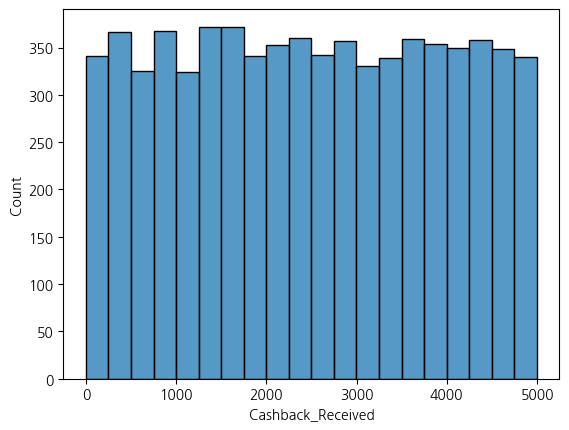

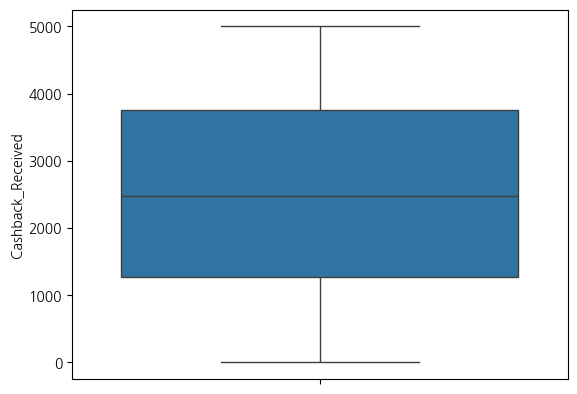


============================== Support_Tickets_Raised ==============================
Support_Tickets_Raised의 unique의 수 = 21

count    7000.000000
mean       10.017571
std         6.037067
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: Support_Tickets_Raised, dtype: float64



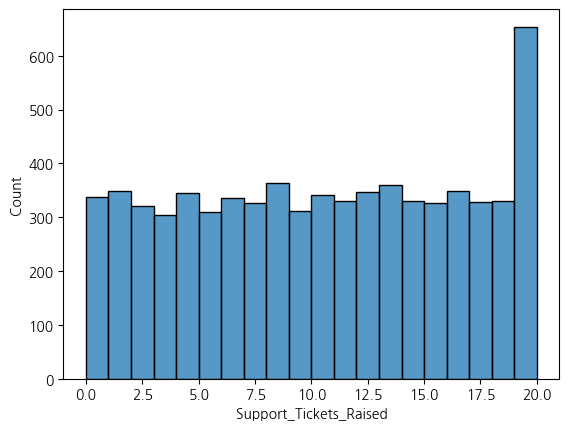

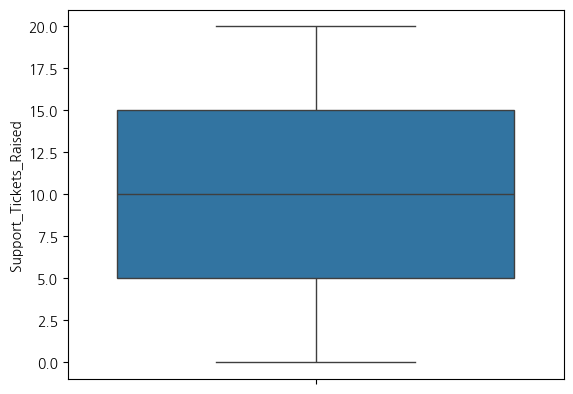


============================== Issue_Resolution_Time ==============================
Issue_Resolution_Time의 unique의 수 = 7000

count    7000.000000
mean       36.528007
std        20.389399
min         1.019853
25%        19.127302
50%        36.257396
75%        54.068594
max        71.978946
Name: Issue_Resolution_Time, dtype: float64



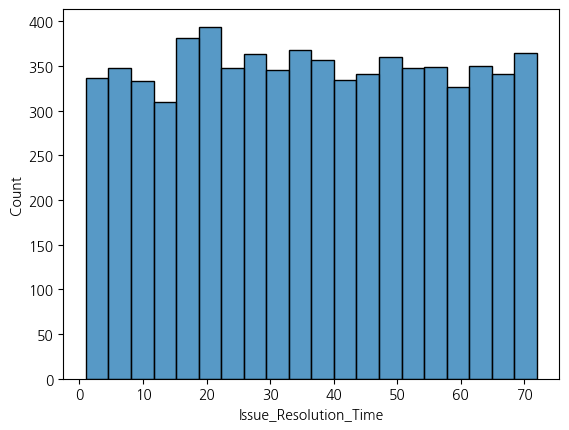

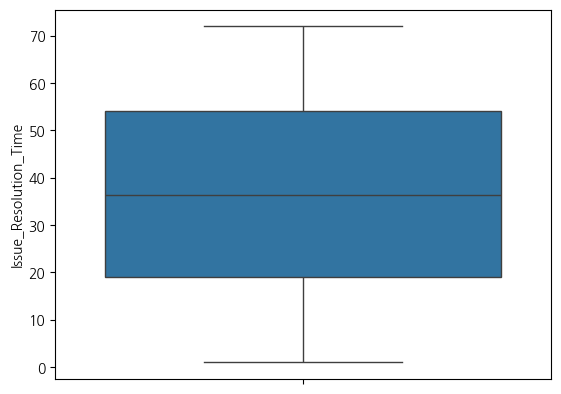


============================== Customer_Satisfaction_Score ==============================
Customer_Satisfaction_Score의 unique의 수 = 10

count    7000.000000
mean        5.479000
std         2.860197
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Customer_Satisfaction_Score, dtype: float64



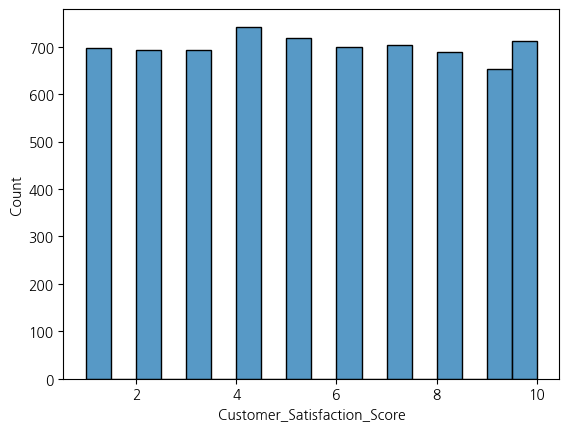

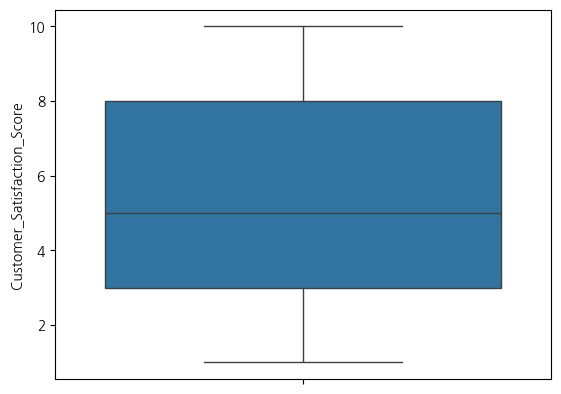


============================== LTV ==============================
LTV의 unique의 수 = 7000

count    7.000000e+03
mean     5.119197e+05
std      4.390551e+05
min      3.770495e+03
25%      1.482058e+05
50%      3.878180e+05
75%      7.748578e+05
max      1.956988e+06
Name: LTV, dtype: float64



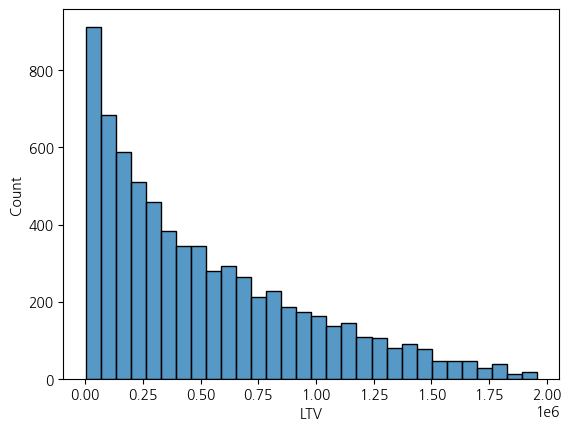

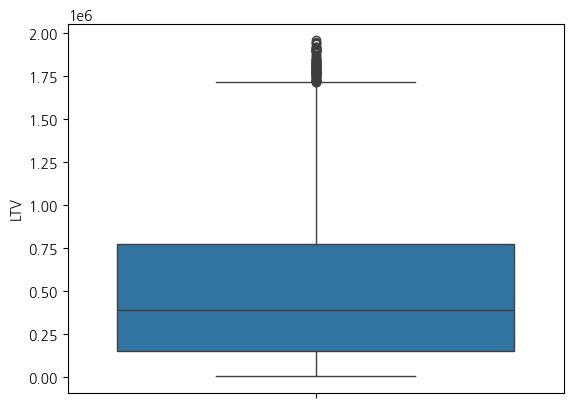

In [11]:
# 각 컬럼에 따른 중복되지 않는 값과 기초통계량 확인
# 히스토그램, 이상치 존재 여부 확인을 위한 박스플롯 확인
for col in data_num:
#     print(col)
    print('='*30, col, '='*30)
    print(f"{col}의 unique의 수 = {data_num[col].nunique()}")
    print()
    
    print(data_num[col].describe())
    print()
    
    sns.histplot(data_num[col])
    plt.show()
    print()
    
    sns.boxplot(data_num[col])
    plt.show()
    print()

- 이상치는 도메인적으로 볼때 큰 이상이 있다고 보기는 어려움
- 이상치는 따로 처리하지 않고 사용